## Observations and Insights 

The pie charts indicate that the distribution of male to female test subjects is very close to being even.  However, the distribution across regimens favors Capomulin and Ramicane, insteda of being flat across all treatments.

From the box plot results, Capomulin and Ramicane also have an overall smaller tumor size following treatment.

The Infubinol regimen was the only treatment that yielded an outlier in the data.

The linear regression does show a positive correlation between weight and tumor size.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = mouse_metadata.merge(study_results, how = 'outer', on='Mouse ID')

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
len(merge_df['Mouse ID'].unique())

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
small_df = merge_df[['Mouse ID', 'Timepoint']].duplicated()

duplicate_index_lst = []
for i in range(len(small_df)):
    if small_df[i]:
        duplicate_index_lst.append(i)


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = merge_df.iloc[duplicate_index_lst, :]

## Get a nested list with the Index associated to the Mouse ID with duplicates
## (In case there are more than on Mouse ID with duplicates)
nested_duplicate_mouse_index_lst = []

for i in duplicate_df['Mouse ID'].unique():
    nested_duplicate_mouse_index_lst.append(merge_df.loc[merge_df['Mouse ID'] == i, :].index)
nested_duplicate_mouse_index_lst

## Open up the nested list and combine all the duplicated data indices associated with duplicates into one big list
duplicate_mouse_index_lst = []

for i in range(len(nested_duplicate_mouse_index_lst)):
    for j in range(len(nested_duplicate_mouse_index_lst[i])):
        duplicate_mouse_index_lst.append(nested_duplicate_mouse_index_lst[i][j])

## Print out the data with duplicated Mouse ID
duplicate_mouse_df = merge_df.iloc[duplicate_mouse_index_lst,:]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

## Since the list(duplicate_mouse_index_lst) contains only the duplicated data,
## We have to reverse it to make a list of data without duplicates 
drop_lst = []

for i in range(len(merge_df)):
    if i not in duplicate_mouse_index_lst:
        drop_lst.append(i)

cleaned_df = merge_df.iloc[drop_lst, :]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
Mean = grouped_df.mean()
Median = grouped_df.median()
VAR = grouped_df.var()
STD = grouped_df.std()
SEM = grouped_df.sem()

# create dictionary for statistical metrics
summary_dic = {
    'Mean': Mean,
    'Median': Median,
    'VAR': VAR,
    "STD": STD,
    'SEM': SEM
}

summary_df = pd.DataFrame(summary_dic)
summary_df


,Mean,Median,VAR,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_summary_df = grouped_df.agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

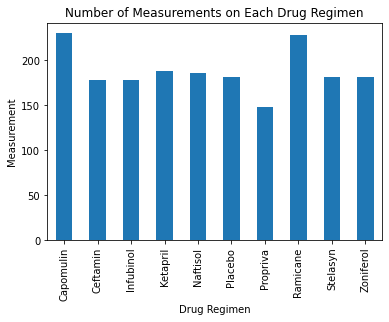

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
small_grouped_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
small_grouped_df
regimen_bar = small_grouped_df.plot(kind='bar', title='Number of Measurements on Each Drug Regimen')
regimen_bar.set_ylabel('Measurement')

plt.show()


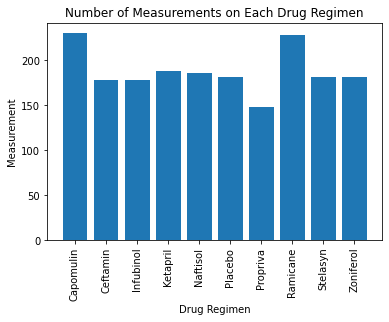

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = [value for value in range(len(merge_df['Drug Regimen'].unique()))]
y_axis = grouped_df.count()
plt.bar(x_axis, y_axis)

x_name = cleaned_df['Drug Regimen'].unique().tolist()
x_name.sort()
plt.xticks(x_axis, x_name, rotation="vertical")
plt.title("Number of Measurements on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement")

plt.show()

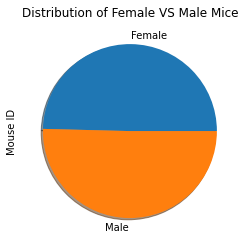

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = cleaned_df.groupby('Sex')['Mouse ID'].nunique()
sex_pie = pie_df.plot(kind='pie', y='Sex', title='Distribution of Female VS Male Mice', shadow=True)

plt.show()


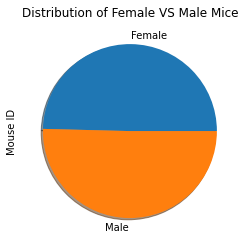

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = cleaned_df['Sex'].unique().tolist()
labels.sort()

sizes = cleaned_df.groupby('Sex')['Mouse ID'].nunique()

plt.pie(sizes, labels = labels, shadow=True)
plt.title('Distribution of Female VS Male Mice')
plt.ylabel('Mouse ID')

plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimen_df = cleaned_df[(cleaned_df["Drug Regimen"] == "Capomulin") |
                        (cleaned_df["Drug Regimen"] == "Ramicane")  |
                        (cleaned_df["Drug Regimen"] == "Infubinol") |
                        (cleaned_df["Drug Regimen"] == "Ceftamin")
                       ]
max_timepoint = regimen_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_drug = pd.merge(max_timepoint_df, cleaned_df, on=("Mouse ID","Timepoint"), how = 'left')
merge_drug_df = pd.DataFrame(merge_drug)
merge_drug_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []
outliers_list = []
for treatment in treatment_list:
    tumor_vol_data = merge_drug.loc[merge_drug["Drug Regimen"] == treatment, :]
    
    tumor_vol_data_list.append(tumor_vol_data['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol_data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5*IQR)
    upper_bound = quartiles[0.75] + (1.5*IQR)
    

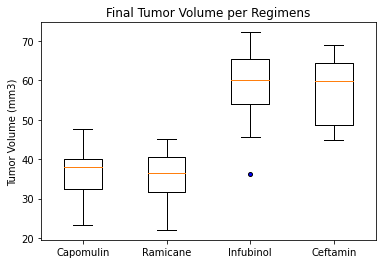

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
props = dict(markerfacecolor = 'blue', markersize = 4)
plt.boxplot(tumor_vol_data_list,labels=treatment_list,flierprops = props)

plt.show()

## Line and Scatter Plots

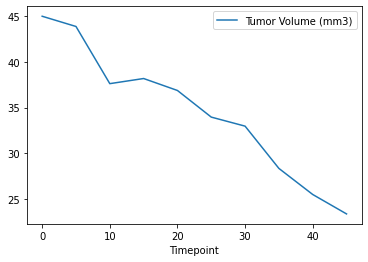

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
random_MouseID = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin')].iloc[0]['Mouse ID']
random_data = cleaned_df.loc[(cleaned_df['Mouse ID'] == random_MouseID)]

random_data.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')

plt.show()

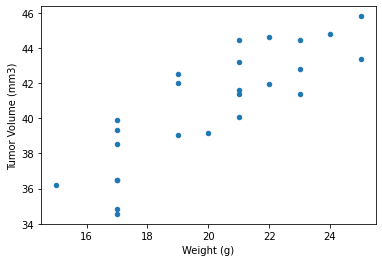

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin')]
avg_volume_data = capomulin_data.groupby("Mouse ID")[['Weight (g)', 'Tumor Volume (mm3)']].mean()

avg_volume_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

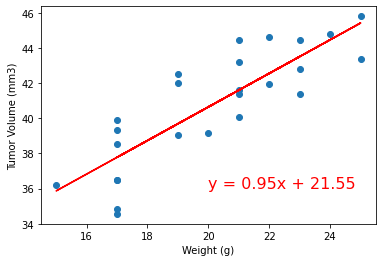

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_volume_data['Weight (g)'], avg_volume_data['Tumor Volume (mm3)'])
regress_values = avg_volume_data['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#avg_volume_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
plt.scatter(avg_volume_data['Weight (g)'], avg_volume_data['Tumor Volume (mm3)'])
plt.plot(avg_volume_data['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()